In [1]:
from config import *
from scripts.data_processing import create_masks, slice_images

Для обучения было сегментированно примерно 4500КМ^2. Хранится это всё в 5ти изображениях, каждое соответствует различным областям России.

Поскольку мы хотим дать пользователю возможность использовать изобраения различной площади, обучать мы будем на небольшой площади ~9КМ^2 (Ниже картинка примерного маштаба, который мы хотим получить в обучающем датасете)
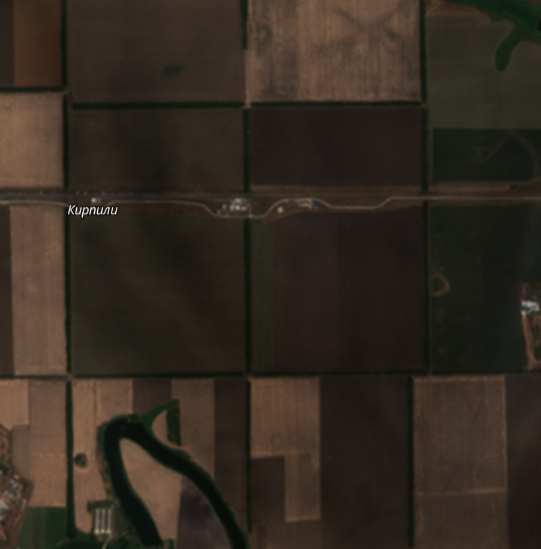

Пользовательские изображения большего маштаба будем обрабатывать скользящим окном с небольшим нахлёстом.

Изображения меньшего маштаба с помощью  тайлинга будем приводить к необходимому маштабу

In [2]:
create_masks(ANNOTATIONS_PATH, RAW_IMAGES_DIR, RAW_MASKS_DIR, COLOR_MAPPING)

Мы получили огромные маски (5 масок каждая примерно 900КМ^2), но наша модель будет работать с изображениями 3x3КМ^2 Поэтому нарежем на изображения подходящего маштаба

In [3]:
slice_images(RAW_IMAGES_DIR, RAW_MASKS_DIR, IMAGES_DIR, MASKS_DIR, 7, 15)

Processing images: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:24<00:00,  4.84s/it]

Created 525 image-mask pairs


Посмотрим на пары изображений масок, который мы получили

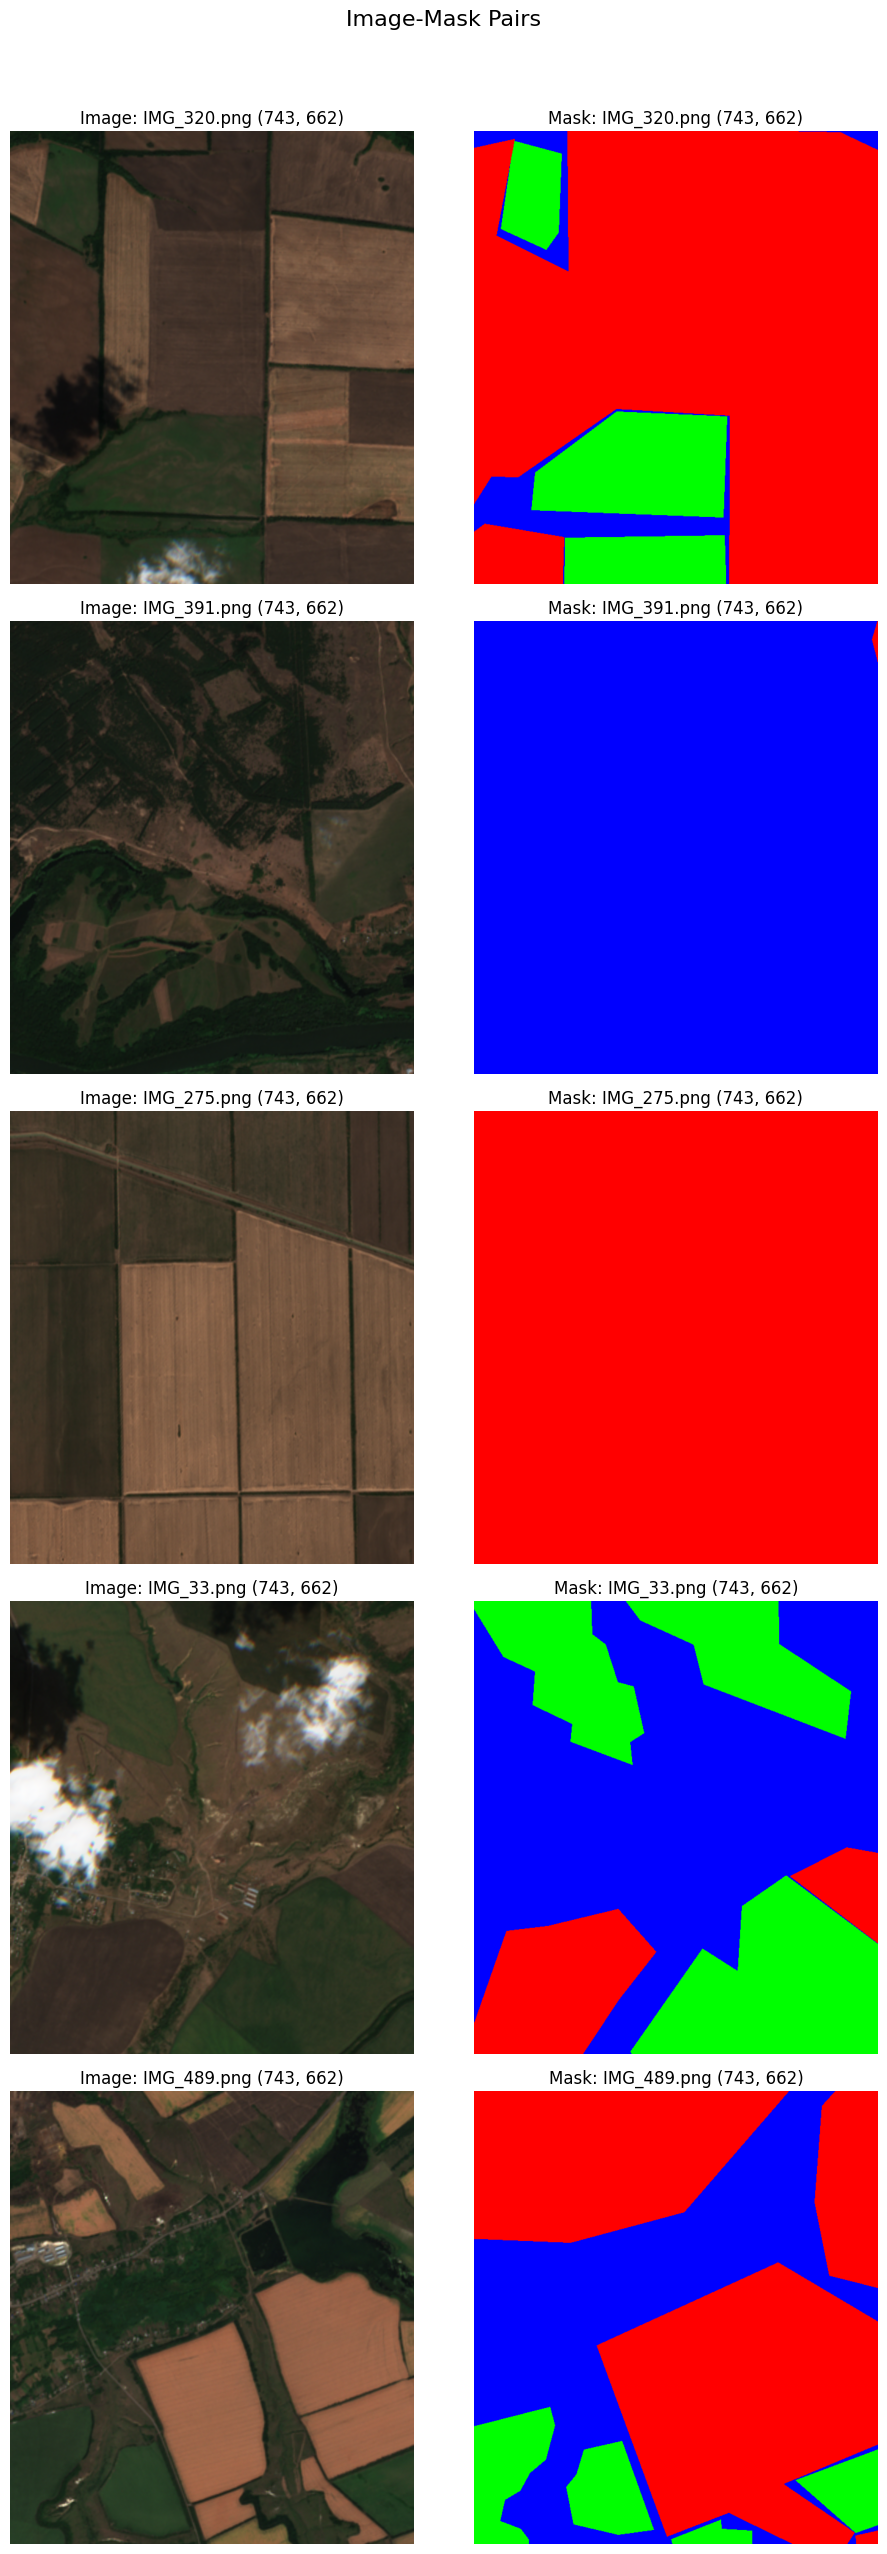

In [4]:
import os
import random
import matplotlib.pyplot as plt
import cv2

NUM_PAIRS_TO_SHOW = 5

valid_pairs = []
for img_name in os.listdir(IMAGES_DIR):
    img_path = os.path.join(IMAGES_DIR, img_name)
    mask_path = os.path.join(MASKS_DIR, img_name)
    
    if os.path.isfile(img_path) and os.path.isfile(mask_path):
        valid_pairs.append((img_path, mask_path))

selected_pairs = random.sample(valid_pairs, min(NUM_PAIRS_TO_SHOW, len(valid_pairs)))

fig, axes = plt.subplots(NUM_PAIRS_TO_SHOW, 2, figsize=(10, 5*NUM_PAIRS_TO_SHOW))
plt.suptitle("Image-Mask Pairs", y=1.02, fontsize=16)

for idx, (img_path, mask_path) in enumerate(selected_pairs):
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    mask = cv2.cvtColor(cv2.imread(mask_path), cv2.COLOR_BGR2RGB)

    axes[idx, 0].imshow(img)
    axes[idx, 0].set_title(f"Image: {os.path.basename(img_path)} {img.shape[:2]}")
    axes[idx, 0].axis('off')

    axes[idx, 1].imshow(mask)
    axes[idx, 1].set_title(f"Mask: {os.path.basename(mask_path)} {img.shape[:2]}")
    axes[idx, 1].axis('off')

plt.tight_layout()
plt.show()

Получили множество изобржаний с отличным маштабом

Будем с помощьью RandomCrop вырезать кусочки 512 на 512 пикселей. получим примерно 2.18КМx2.18КМ